In [2]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.datasets import load_boston # load the dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#Loading data
boston = load_boston()
print("features name:", boston['feature_names'])
#converting to dataframe
df=pd.DataFrame(boston.data, columns=boston.feature_names)
print(f'${len(df)} lines loaded')

features name: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
$506 lines loaded


In [6]:
df['MEDV'] = boston.target

In [46]:
#input features
X= pd.DataFrame(np.c_[df['LSTAT']], columns=['LSTAT'])
X_MLR = pd.DataFrame(np.c_[df['LSTAT'], df['RM'],df['DIS']], columns=['LSTAT','RM', 'DIS'])

In [49]:
#data split
X_train, X_test, Y_train, Y_test = train_test_split(X, boston['target'], test_size=0.25, random_state=5)
X_train_MLR, X_test_MLR, Y_train_MLR, Y_test_MLR = train_test_split(X_MLR, df['MEDV'], test_size=0.25, random_state=5)

R^2: 0.5154907869513135
Adjusted R^2: 0.511614713246924
RMSE: 6.3239250854834745


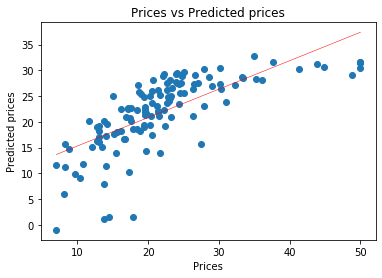

In [50]:
#Linear Regression
lr = LinearRegression()
lr.fit(X_train, Y_train)
yprd = lr.predict(X_train)

# Predicting Test data
y_test_pred = lr.predict(X_test)
b, m = np.polynomial.polynomial.polyfit(Y_test, y_test_pred, 1)
#print the evaluations
print('R^2:',metrics.r2_score(Y_test, y_test_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_test, y_test_pred))*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred)))

#plot
plt.scatter(Y_test, y_test_pred)
sns.lineplot(np.unique(Y_test), np.unique(np.poly1d(b + m * np.unique(Y_test))), linewidth=0.5, color='r')
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

R^2: 0.6500187637088778
Adjusted R^2: 0.6472189138185488
RMSE: 5.374747633859793


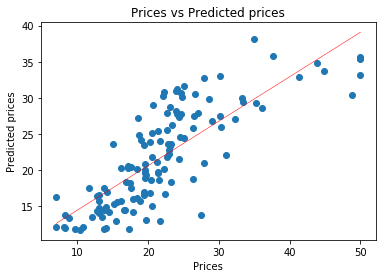

In [55]:
#polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)

# fit the transformed features to Linear Regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train)

# predicting on training data-set
y_train_predicted = poly_model.predict(X_train_poly)

# predicting on test data-set
y_test_predicted = poly_model.predict(poly_features.fit_transform(X_test))
b, m = np.polynomial.polynomial.polyfit(Y_test, y_test_predicted, 1)

#print the evaluations
print('R^2:',metrics.r2_score(Y_test, y_test_predicted))
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_test, y_test_predicted))*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test, y_test_predicted)))

#plot 
plt.scatter(Y_test, y_test_predicted)
sns.lineplot(np.unique(Y_test), np.unique(np.poly1d(b + m * np.unique(Y_test))), linewidth=0.5, color='r')
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()



R^2: -40.78914971340395
Adjusted R^2: -41.12346291111118
RMSE: 58.731009260440096


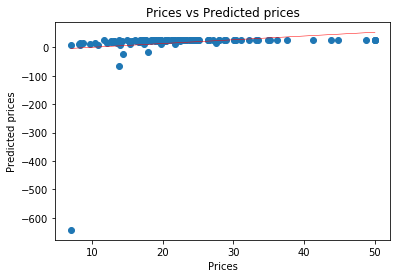

In [57]:
#Polynomial regression for degree=20
poly_features = PolynomialFeatures(degree=20)
X_train_poly = poly_features.fit_transform(X_train)

# fit the transformed features to Linear Regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train)

# predicting on training data-set
y_train_predicted = poly_model.predict(X_train_poly)

# predicting on test data-set
y_test_predicted = poly_model.predict(poly_features.fit_transform(X_test))
b, m = np.polynomial.polynomial.polyfit(Y_test, y_test_predicted, 1)

#print the evaluations
print('R^2:',metrics.r2_score(Y_test, y_test_predicted))
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_test, y_test_predicted))*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test, y_test_predicted)))

#plot 
plt.scatter(Y_test, y_test_predicted)
sns.lineplot(np.unique(Y_test), np.unique(np.poly1d(b + m * np.unique(Y_test))), linewidth=0.5, color='r')
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

R^2: 0.6401149770871786
Adjusted R^2: 0.637235896903876
RMSE: 5.450264554823107


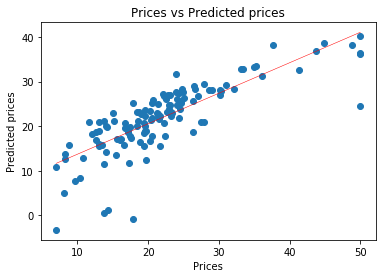

In [56]:
#Multiple Regression
lr = LinearRegression()
lr.fit(X_train_MLR, Y_train_MLR)
yprd_MLR = lr.predict(X_train_MLR)

# Predicting Test data
y_test_pred_MLR = lr.predict(X_test_MLR)
b, m = np.polynomial.polynomial.polyfit(Y_test_MLR, y_test_pred_MLR, 1)

#print the evaluations
print('R^2:',metrics.r2_score(Y_test_MLR, y_test_pred_MLR))
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_test_MLR, y_test_pred_MLR))*(len(Y_test_MLR)-1)/(len(Y_test_MLR)-X_test.shape[1]-1))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test_MLR, y_test_pred_MLR)))

#plot
plt.scatter(Y_test_MLR, y_test_pred_MLR)
sns.lineplot(np.unique(Y_test_MLR), np.unique(np.poly1d(b + m * np.unique(Y_test_MLR))), linewidth=0.5, color='r')
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()